In [1]:
import pandas as pd
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC,LinearSVR
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plot
%matplotlib inline
import os
import glob
import numpy as np
from scipy.sparse import vstack
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import TfidfVectorizer
import lightgbm as lgb

import datetime
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import datetime
#import matplotlib.pyplot as plt
import pandas as pd
import glob
import tqdm
import datetime
import keras
import numpy as np
#test getWindowedValue

from numpy.lib.stride_tricks import as_strided
from keras.models import Sequential

from keras.layers.convolutional import Conv3D,Conv2D,MaxPooling1D,MaxPooling2D,MaxPooling3D,Conv1D
from keras.layers import Lambda,Multiply ,TimeDistributed
from keras.layers import GlobalAveragePooling1D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers.wrappers import TimeDistributed
from keras import initializers
from keras.engine import InputSpec, Layer
from keras.layers import Dense,Dropout,Flatten,Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam,SGD
import tensorflow as tf
import keras.backend.tensorflow_backend as K
from keras.backend.tensorflow_backend import set_session
#config = tf.ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.5
#set_session(tf.Session(config=config))
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential,Model
from keras.optimizers import Adam,RMSprop
from keras.activations import tanh,relu
#from keras.utils import multi_gpu_model
from keras.layers.advanced_activations import PReLU,LeakyReLU,ELU
from keras.layers import Dense, Dropout, Activation, Flatten,LSTM,GRU,Input,InputLayer,Activation, Input,Conv1D,MaxPooling1D,GlobalAveragePooling1D
from keras.layers import Convolution2D, MaxPooling2D,TimeDistributed,Convolution1D,MaxPooling1D,concatenate, Average,BatchNormalization,GlobalMaxPool1D
from keras.utils import np_utils
from keras import losses
#from keras_tqdm import TQDMNotebookCallback
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.grid_search import GridSearchCV
import sklearn
import numpy as np
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from IPython.display import SVG

import keras
import matplotlib.pyplot as plt
import librosa
import librosa.display as dsp
#from fastText import train_unsupervised
%load_ext autoreload 
%autoreload 2
LengthOfInputSequences=60
fs=16000
import IPython.display
from keras.layers import Embedding
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
import soundfile as sf

/home/steven/python3_env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/steven/python3_env/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/steven/python3_env/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored cl

In [2]:
fs=glob.glob('/home/steven/data/ifly/*.zip')
print(fs)
lbs=['minnan', 'changsha','kejia', 'shanghai', 'hebei', 'nanchang']
dataroot='/home/steven/data/ifly/'

['/home/steven/data/ifly/minnan.zip', '/home/steven/data/ifly/changsha.zip', '/home/steven/data/ifly/kejia.zip', '/home/steven/data/ifly/shanghai.zip', '/home/steven/data/ifly/hebei.zip', '/home/steven/data/ifly/nanchang.zip']


In [3]:
trainFiles=glob.glob(dataroot+lbs[0]+'/train/*/*.pcm')
#spklables=[s.split('/')[-1][:-8] for s in trainFiles]
#print(trainFiles)
#print(spklables)
print(len(trainFiles))
devShortFiles=glob.glob(dataroot+lbs[0]+'/dev/*/short/*.pcm')
devLenFiles=glob.glob(dataroot+lbs[0]+'/dev/*/long/*.pcm')
#spklables=[s.split('/')[-1][:-8] for s in trainFiles]
#print(trainFiles)
#print(spklables)
print(len(devShortFiles))
print(len(devLenFiles))
#print(devFiles)
allTrainNames=[]
allDevShortNames=[]
allDevLongNames=[]
for l in lbs:    
    allTrainNames.append(glob.glob(dataroot+l+'/train/*/*.pcm'))
    allDevShortNames.append(glob.glob(dataroot+l+'/dev/*/short/*.pcm'))
    allDevLongNames.append(glob.glob(dataroot+l+'/dev/*/long/*.pcm'))

print(len(allTrainNames))
print(len(allDevShortNames))
print(len(allDevLongNames))
print(len(allTrainNames[0]))
print(len(allDevShortNames[0]))
print(len(allDevLongNames[0]))

6000
250
250
6
6
6
6000
250
250


In [4]:

print(trainFiles[0])
y,sr=librosa.load(trainFiles[0],mono=True,sr=16000,dtype=np.int16,offset=0)

/home/steven/data/ifly/minnan/train/speaker11/minnan_train_speaker11_032.pcm


In [5]:
print(type(y),y.shape)

<class 'numpy.ndarray'> (0,)


In [6]:

x, fs = sf.read(trainFiles[3],channels=1,samplerate=16000,format='RAW',subtype='PCM_16')

<class 'numpy.ndarray'> (160000,) 160000


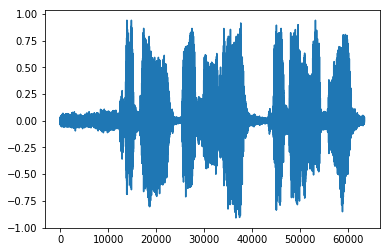

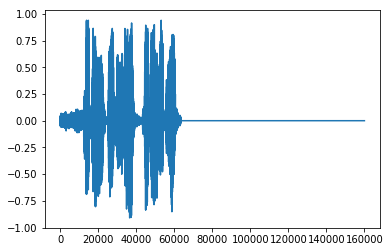

In [7]:
plot.plot(x)
if len(x)<fs*10:
    x2=np.zeros((fs*10))
    x2[:len(x)]=x
    x=x2
else:
    x=x[:fs*10]
print(type(x),x.shape,len(x))
plot.figure()
plot.plot(x)

In [27]:
print(fs)

# Play it back!
IPython.display.Audio(data=x, rate=fs)



16000


In [28]:
#1 s 16000
#1 frame =160
# 1 poolsize 160
def getcnn1d(nclasses=6):
    model = Sequential()
    kernel_size = 3
    filters = 64
    pool_size = 40
    lstm_output_size=70
    '''
    model.add(Embedding(modelW2V.get_output_matrix().shape[0], 
                        modelW2V.get_output_matrix().shape[1], 
                        input_length=LengthOfInputSequences,
                        weights=[modelW2V.get_output_matrix()]
                       ))
     '''            
    model.add(keras.layers.Reshape(input_shape=(fs*10,),target_shape=(fs*10,1)))
    model.add(keras.layers.BatchNormalization())
    #model.add(Dropout(0.25))
    #model.add(Conv1D(256,
    #                 kernel_size=(1,),
    #                 padding='valid',
    #                 activation='relu',
    #                 strides=1))
    model.add(Conv1D(64,
                     kernel_size=(160,),
                     padding='same',
                     activation='tanh',
                     strides=1))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Dropout(0.25))
    model.add(Conv1D(64,
                     kernel_size=(160,),
                     padding='same',
                     activation='tanh',
                     strides=1))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dropout(0.25))
    model.add(Dense(200,activation='relu'))
    #model.add(Dense(200,activation='relu'))
    model.add(Dense(6,activation='softmax'))
    #model.add(Activation('softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adam(lr=0.001),
                  metrics=['accuracy'])
    return model


def getcnn1d_0_3(nclasses=6):
    model = Sequential()
    kernel_size = 3
    filters = 64
    pool_size = 4
    lstm_output_size=70
    '''
    model.add(Embedding(modelW2V.get_output_matrix().shape[0], 
                        modelW2V.get_output_matrix().shape[1], 
                        input_length=LengthOfInputSequences,
                        weights=[modelW2V.get_output_matrix()]
                       ))
     '''            
    model.add(keras.layers.Reshape(input_shape=(fs*10,),target_shape=(fs*10,1)))
    model.add(keras.layers.BatchNormalization())
    #model.add(Dropout(0.25))
    #model.add(Conv1D(256,
    #                 kernel_size=(1,),
    #                 padding='valid',
    #                 activation='relu',
    #                 strides=1))
    model.add(Conv1D(64,
                     10,
                     padding='same',
                     activation='relu',
                     strides=1))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Dropout(0.25))
    model.add(Conv1D(128,
                     8,
                     padding='same',
                     activation='relu',
                     strides=1))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(256,
                     8,
                     padding='same',
                     activation='relu',
                     strides=1))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(256,
                     8,
                     padding='same',
                     activation='relu',
                     strides=1))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(256,
                     8,
                     padding='same',
                     activation='relu',
                     strides=1))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(256,
                     8,
                     padding='same',
                     activation='relu',
                     strides=1))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(256,
                     8,
                     padding='same',
                     activation='relu',
                     strides=1))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(256,
                     8,
                     padding='same',
                     activation='relu',
                     strides=1))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dropout(0.25))
    model.add(Dense(200,activation='relu'))
    #model.add(Dense(200,activation='relu'))
    model.add(Dense(6,activation='softmax'))
    #model.add(Activation('softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adam(lr=0.001),
                  metrics=['accuracy'])
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 160000, 1)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 160000, 1)         4         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 160000, 64)        10304     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4000, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4000, 64)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4000, 64)          655424    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 100, 64)           0         
__________

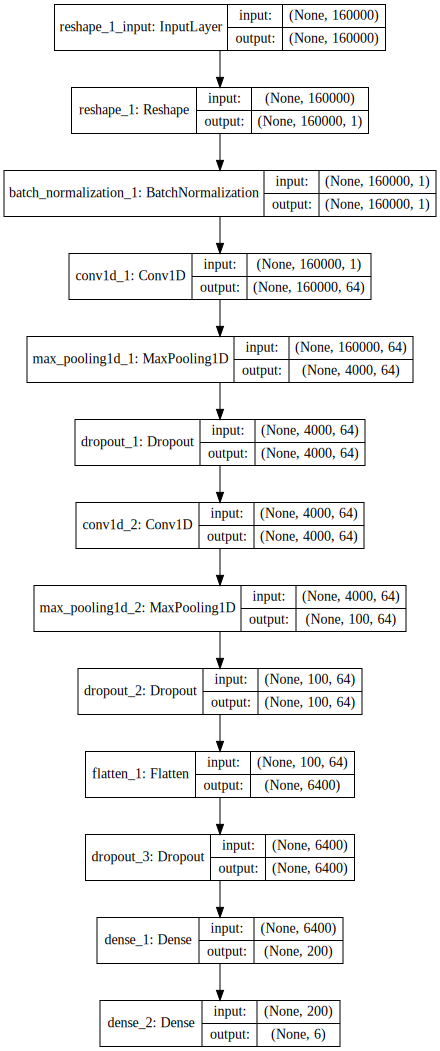

In [29]:
from keras import backend as K
K.clear_session()
crf=getcnn1d()

plot_model(crf, to_file='getcnn1d.png',show_shapes=True)
SVG(model_to_dot(crf, show_shapes=True).create(prog='dot', format='svg'))

In [30]:
batchSize=8

def trainDataGenerator(batchSize=batchSize):
    while True:
        rvx,rvy=[],[]
        for i in range(batchSize):
            randomLB=np.random.randint(len(allTrainNames))
            tempLB=np.zeros((len(allTrainNames)))
            tempLB[randomLB]=1
            rvy.append(tempLB)
            randomFileIndex=np.random.randint(len(allTrainNames[randomLB]))
            selectedFile=allTrainNames[randomLB][randomFileIndex]
            x, fs = sf.read(selectedFile,channels=1,samplerate=16000,format='RAW',subtype='PCM_16')
            maxLen=fs*10
            if len(x)<maxLen:
                x2=np.zeros((maxLen))
                x2[:len(x)]=x
                x=x2
            else:
                x=x[:maxLen]
            rvx.append(x)

        yield np.array(rvx),np.array(rvy)
        
        
    
def devMixDataGenerator(batchSize=batchSize):
    while True:
        
        rvx,rvy=[],[]
        for i in range(batchSize):
            lors=np.random.randint(2)
            if lors:
                thisData=allDevLongNames
            else:
                thisData=allTrainNames
            randomLB=np.random.randint(len(thisData))
            tempLB=np.zeros((len(thisData)))
            tempLB[randomLB]=1
            rvy.append(tempLB)
            randomFileIndex=np.random.randint(len(thisData[randomLB]))
            selectedFile=thisData[randomLB][randomFileIndex]
            x, fs = sf.read(selectedFile,channels=1,samplerate=16000,format='RAW',subtype='PCM_16')
            maxLen=fs*10
            if len(x)<maxLen:
                x2=np.zeros((maxLen))
                x2[:len(x)]=x
                x=x2
            else:
                x=x[:maxLen]
            rvx.append(x)
        yield np.array(rvx),np.array(rvy)

def devLongDataGenerator(batchSize=batchSize):
    while True:
        
        rvx,rvy=[],[]
        for i in range(batchSize):

            thisData=allDevLongNames
            randomLB=np.random.randint(len(thisData))
            tempLB=np.zeros((len(thisData)))
            tempLB[randomLB]=1
            rvy.append(tempLB)
            randomFileIndex=np.random.randint(len(thisData[randomLB]))
            selectedFile=thisData[randomLB][randomFileIndex]
            x, fs = sf.read(selectedFile,channels=1,samplerate=16000,format='RAW',subtype='PCM_16')
            maxLen=fs*10
            if len(x)<maxLen:
                x2=np.zeros((maxLen))
                x2[:len(x)]=x
                x=x2
            else:
                x=x[:maxLen]
            rvx.append(x)
        yield np.array(rvx),np.array(rvy)
        
def devShortDataGenerator(batchSize=batchSize):
    while True:
        
        rvx,rvy=[],[]
        for i in range(batchSize):

            thisData=allDevShortNames
            randomLB=np.random.randint(len(thisData))
            tempLB=np.zeros((len(thisData)))
            tempLB[randomLB]=1
            rvy.append(tempLB)
            randomFileIndex=np.random.randint(len(thisData[randomLB]))
            selectedFile=thisData[randomLB][randomFileIndex]
            x, fs = sf.read(selectedFile,channels=1,samplerate=16000,format='RAW',subtype='PCM_16')
            maxLen=fs*10
            if len(x)<maxLen:
                x2=np.zeros((maxLen))
                x2[:len(x)]=x
                x=x2
            else:
                x=x[:maxLen]
            rvx.append(x)
        yield np.array(rvx),np.array(rvy)

In [31]:
x,y=next(iter(trainDataGenerator(16)))

In [32]:
#print(x[0].shape,x[1].shape)
print(x.shape,y.shape)

(16, 160000) (16, 6)


In [33]:
crf.fit_generator(generator=trainDataGenerator(8), 
                  steps_per_epoch=1000, 
                  epochs=10, verbose=1, 
                  validation_data=devMixDataGenerator(8), 
                  validation_steps=100,
                  shuffle=True, )

Epoch 1/10
1000/1000 [==============================] - 578s 578ms/step - loss: 1.5984 - acc: 0.3300 - val_loss: 1.4753 - val_acc: 0.4238
Epoch 2/10
1000/1000 [==============================] - 595s 595ms/step - loss: 1.2765 - acc: 0.4341 - val_loss: 1.0449 - val_acc: 0.4938
Epoch 3/10
1000/1000 [==============================] - 595s 595ms/step - loss: 1.0177 - acc: 0.5354 - val_loss: 0.9694 - val_acc: 0.6488
Epoch 4/10
1000/1000 [==============================] - 597s 597ms/step - loss: 0.9710 - acc: 0.5877 - val_loss: 0.9195 - val_acc: 0.6663
Epoch 5/10
1000/1000 [==============================] - 599s 599ms/step - loss: 0.9071 - acc: 0.6312 - val_loss: 0.9054 - val_acc: 0.6850
Epoch 6/10
1000/1000 [==============================] - 600s 600ms/step - loss: 0.8168 - acc: 0.6775 - val_loss: 0.9519 - val_acc: 0.6675
Epoch 7/10
  11/1000 [..............................] - ETA: 9:50 - loss: 0.7820 - acc: 0.7614

KeyboardInterrupt: 